# Electronic Nose System

## Dependencies

In [1]:
"""
file: dependencies.py
author: @VincitoreSi
date: 2023-12-16
brief: Dependencies for the project
"""

import numpy as np
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 1000
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

## Helper Functions

In [2]:
"""
file: helper.py
author: @VincitoreSi
date: 2023-12-16
brief: Helper functions for the project
"""

from dependencies.dependencies import plt, itertools, np, pd, confusion_matrix, MaxAbsScaler, train_test_split

def lead_and_prepare_data():
    """
    Load and prepare data 
    """
    # Load data
    print("Loading data...")
    # columns = ["Time (seconds)", "Methane conc (ppm)", "Ethylene conc (ppm)"] + ["Sensor " + str(i) for i in range(1, 17)]
    # df = pd.read_csv(PATH3, delim_whitespace=True, names=columns)
    datatrain1=pd.read_csv('Data/data/ethylene_CO.txt', delim_whitespace=True)
    datatrain2=pd.read_csv('Data/data/ethylene_methane.txt', delim_whitespace=True)
    X1=np.array(datatrain1)
    X2=np.array(datatrain2)
    print(X1.shape)
    print(X2.shape)

    array_list=[X1,X2]
    sample = np.concatenate([X1, X2])
    lengths = [len(X1), len(X2)]
    datatrain_array=np.vstack(array_list)
    
    xtrain = datatrain_array

    #Setting the target value 0 for ethylene_CO and 1 for ethylene_methane
    y1=np.zeros(4208261)
    y2=np.ones(4178504)
    ytrain=np.concatenate([y1,y2])
    
    print(f"X_train shape: {xtrain.shape}")
    print(f"y_train shape: {ytrain.shape}")

    max_abs_scaler = MaxAbsScaler()
    xtrain = max_abs_scaler.fit_transform(xtrain) 
    X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=.001,random_state=1)
    return X_train, X_test, y_train, y_test

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def load_gas_data(path):
    data = pd.read_csv(path)
    X = data.iloc[:, :-2]
    y = data.iloc[:, -2]
    return np.array(X), np.array(y)

## Dimensionality Reduction

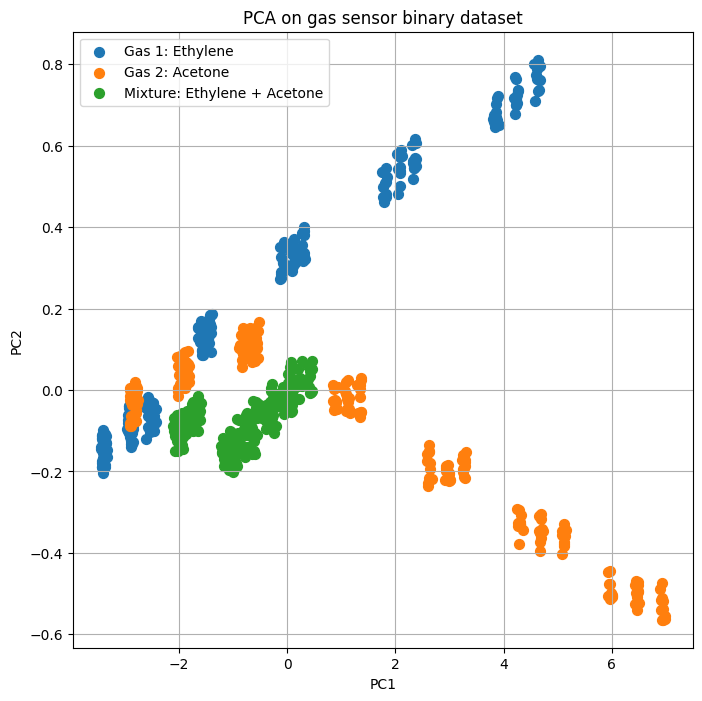

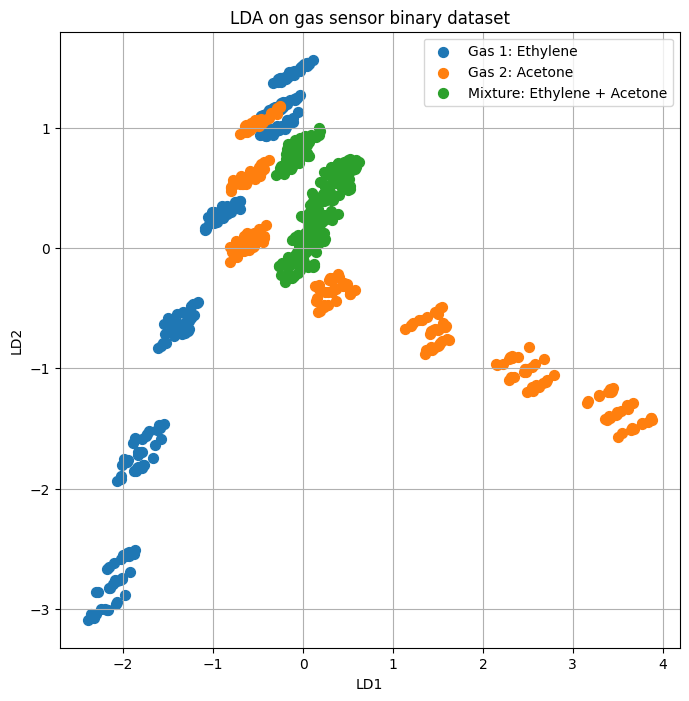

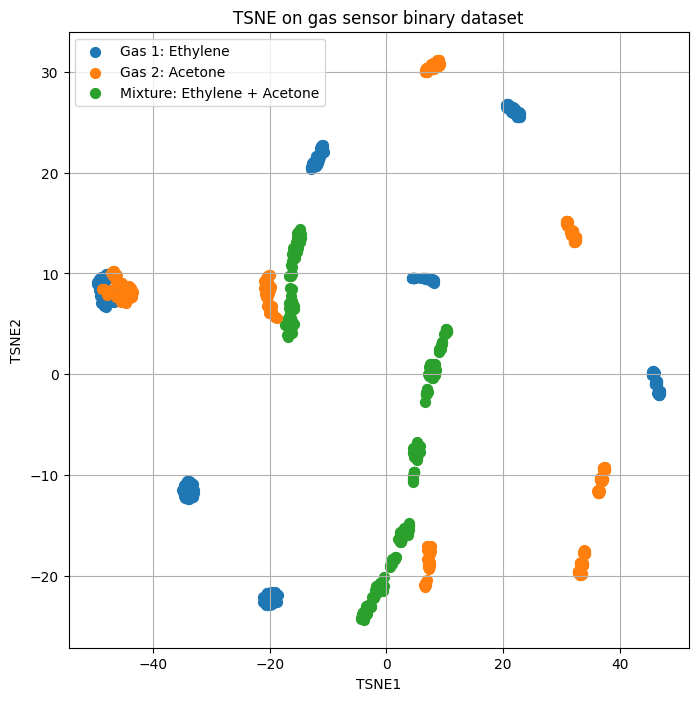

In [3]:
def pca(X_train, n_comp):
    xtrain = PCA(n_components=n_comp).fit_transform(X_train)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d') 
    ax.plot(xtrain[0:4208261,0], xtrain[0:4208261,1], xtrain[0:4208261,2], markersize=8, label='ethylene_CO')
    ax.plot(xtrain[1048575:8386765,0], xtrain[1048575:8386765,1], xtrain[1048575:8386765,2], markersize=8, label='ethylene_methane')

    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA on gas sensor binary dataset")
    ax.legend(loc='upper right')

    # show plot
    # plt.show()
    # save plot to file
    plt.savefig('output/pca2.png')
    
# function to fit PCA on data
def apply_pca(data, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    return pca


# function to get the PCA transformed data
def get_pca_data(pca, data):
    return pd.DataFrame(pca.transform(data), columns=["PC1", "PC2"])


# visualize the data to know if it is separable or not
def visualize_data(data, labels, title, ax_labels):
    fig, ax = plt.subplots(figsize=(8, 8))
    colors = {"tab:blue": 1, "tab:orange": 2, "tab:green": 3}
    for color in colors.keys():
        ax.scatter(
            data.loc[labels == colors[color], ax_labels[0]],
            data.loc[labels == colors[color], ax_labels[1]],
            c=color,
            s=50,
        )
        ax.legend(["Gas 1: Ethylene", "Gas 2: Acetone", "Mixture: Ethylene + Acetone"])
        ax.grid()
        ax.set_xlabel(ax_labels[0])
        ax.set_ylabel(ax_labels[1])
        ax.set_title(title)
    # plt.show()
    plt.savefig(f'output/{title}.png')
    plt.show()

def apply_lda(data, labels, n_components):
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    lda.fit(data, labels)
    transformed_data = lda.transform(data)
    return pd.DataFrame(transformed_data, columns=["LD1", "LD2"])

def apply_tsne(data, n_components):
    tsne = TSNE(n_components=n_components)
    tsne.fit(data)
    transformed_data = tsne.fit_transform(data)
    return pd.DataFrame(transformed_data, columns=["TSNE1", "TSNE2"])

def main():
    """
    Main function
    """
    # X_train, X_test, y_train, y_test = lead_and_prepare_data()
    X, y = load_gas_data('Data/data/expanded_data.csv')
    pc = apply_pca(X, 2)
    pc_data = get_pca_data(pc, X)
    visualize_data(pc_data, y, "PCA on gas sensor binary dataset", ["PC1", "PC2"])
    ld = apply_lda(X, y, 2)
    visualize_data(ld, y, "LDA on gas sensor binary dataset", ["LD1", "LD2"])
    tsne = apply_tsne(X, 2)
    visualize_data(tsne, y, "TSNE on gas sensor binary dataset", ["TSNE1", "TSNE2"])


if __name__ == "__main__":
    main()

## Binary Classification

### AdaBoost Classifier

Loading data...
(4208261, 12)
(4178504, 12)
X_train shape: (8386765, 12)
y_train shape: (8386765,)
AdaBoost classifier
n_estimators:  100
learning_rate:  1
Training...
Training time:  6618.485889196396
Testing...
Testing time:  0.2662699222564697
Accuracy:  1.0
Confusion matrix:
Confusion matrix, without normalization
[[4271    0]
 [   0 4116]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


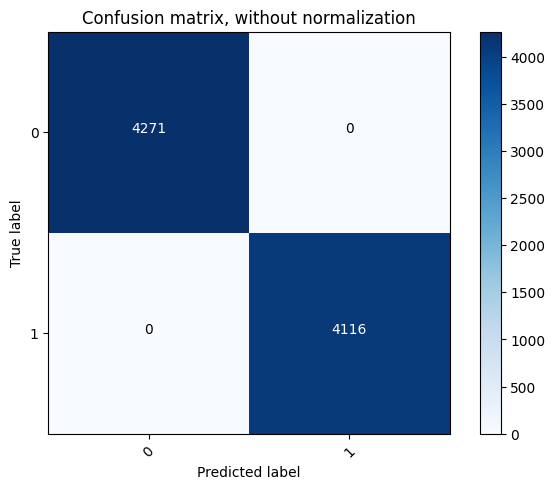

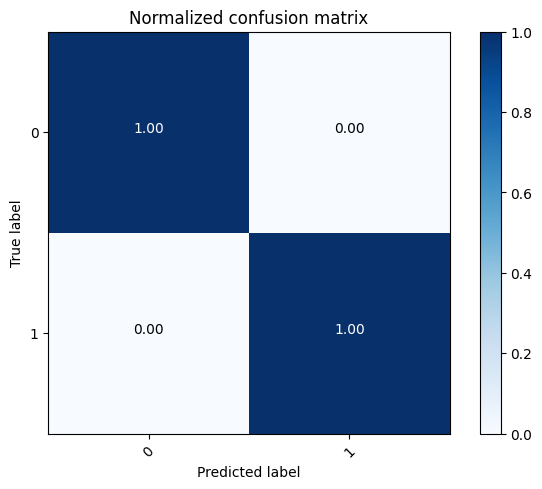

In [4]:
def adaboost(X_train, X_test, y_train, y_test, n_estimators, learning_rate):
    """
    AdaBoost classifier for the binary classification problem
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :param n_estimators: number of estimators
    :param learning_rate: learning rate
    :param max_depth: maximum depth
    :return: AdaBoost classifier
    """
    print("AdaBoost classifier")
    print("n_estimators: ", n_estimators)
    print("learning_rate: ", learning_rate)
    print("Training...")
    start = time.time()
    clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    clf.fit(X_train, y_train)
    end = time.time()
    print("Training time: ", end - start)
    print("Testing...")
    start = time.time()
    y_pred = clf.predict(X_test)
    end = time.time()
    print("Testing time: ", end - start)
    print("Accuracy: ", clf.score(X_test, y_test))
    print("Confusion matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["0", "1"], title='Confusion matrix, without normalization')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["0", "1"], normalize=True, title='Normalized confusion matrix')
    plt.show()
    return clf

def main():
    """
    Main function
    """
    X_train, X_test, y_train, y_test = lead_and_prepare_data()
    clf = adaboost(X_train, X_test, y_train, y_test, 100, 1)
    
if __name__ == "__main__":
    main()